In [150]:
from pymatgen.ext.matproj import MPRester
from pymatgen.core import lattice
from pymatgen.symmetry.structure import SymmetrizedStructure as ss
import numpy as np
import pymatgen.symmetry.analyzer as an
#On va chercher les infos sur le MP avec notre API
with MPRester("AmIEJp5xndflZHbo32t") as m:
    # On obtient la structure de l'élément depuis le MP
    structure = m.get_structure_by_material_id("mp-19")
    display(structure)
    atome1=np.array([[0.2690, 0.0000, 0.3333]])
    atome2=np.array([[0.0000, 0.2690, 0.6667]])
    atome3=np.array([[0.7310, 0.7310, 0.0000]])
    print("On a donc les 3 différents atomes dont nous allons parler qui ont pour coordonnées",atome1,atome2,atome3)
    #On va chercher les outils
    analyse=an.SpacegroupAnalyzer(structure)
    symm=analyse.get_symmetry_operations()
    symetrie_1=symm[1]
    symetrie_2=symm[3]
    symetrie_3=symm[5]

Structure Summary
Lattice
    abc : 4.51237418 4.512374178907963 5.95989883
 angles : 90.0 90.0 120.0000000080056
 volume : 105.09443753138906
      A : 4.51237418 0.0 0.0
      B : -2.25618709 3.90783067 0.0
      C : 0.0 0.0 5.95989883
PeriodicSite: Te (1.2136, 0.0000, 1.9866) [0.2690, 0.0000, 0.3333]
PeriodicSite: Te (-0.6068, 1.0510, 3.9733) [0.0000, 0.2690, 0.6667]
PeriodicSite: Te (1.6494, 2.8568, 0.0000) [0.7310, 0.7310, 0.0000]

On a donc les 3 différents atomes dont nous allons parler qui ont pour coordonnées [[0.269  0.     0.3333]] [[0.     0.269  0.6667]] [[0.731 0.731 0.   ]]


Nous allons donc expliciter 3 symétries dans la maille du Tellure. La première est une rotation hélicoïdale autour de l'axe C

In [151]:
print("Prenons tout d'abord l'atome situé en",atome1)
print("A x,y,z doivent correspondre",symetrie_1.as_xyz_string(),", on a donc comme matrice de rotation")
print(symetrie_1.rotation_matrix,"\net vecteur de translation\n",symetrie_1.translation_vector)
print("En effectuant le produit matriciel et en y ajoutant le vecteur de translation on obtient ")
print(np.dot(symetrie_1.rotation_matrix,atome1.T)+(np.array([symetrie_1.translation_vector])).T)
print("Ce qui correspond bien à ",symetrie_1.operate((0.269,0,0.3333)),"donné par la fonction operate")
print("Celà se représente comme ceci:")


Prenons tout d'abord l'atome situé en [[0.269  0.     0.3333]]
A x,y,z doivent correspondre -y, x-y, z+1/3 , on a donc comme matrice de rotation
[[ 0. -1.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]] 
et vecteur de translation
 [0.         0.         0.33333333]
En effectuant le produit matriciel et en y ajoutant le vecteur de translation on obtient 
[[0.        ]
 [0.269     ]
 [0.66663333]]
Ce qui correspond bien à  [0.         0.269      0.66663333] donné par la fonction operate
Celà se représente comme ceci:


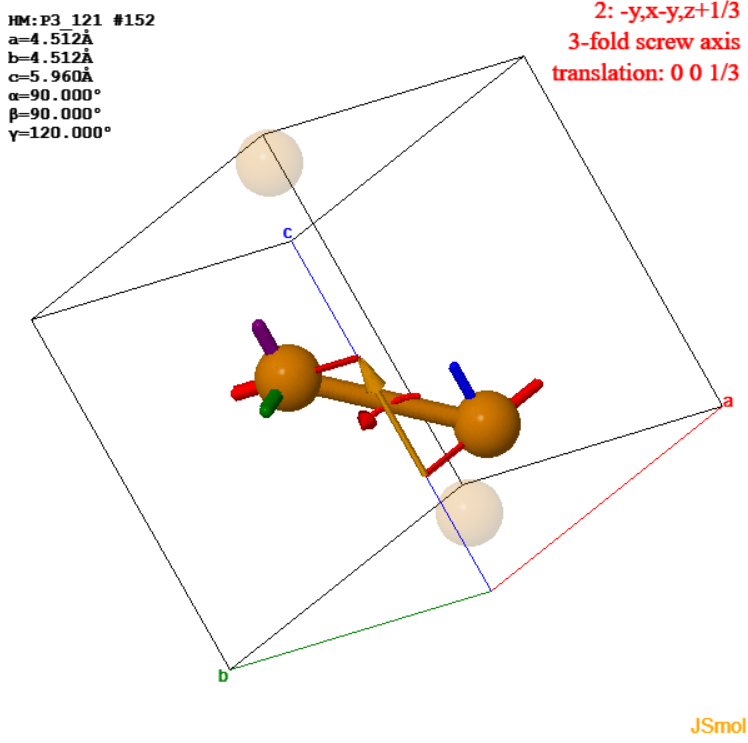

In [152]:
print("Pour la deuxième symétrie, nous regarderons l'atome situé en",atome2)
print("A x,y,z doivent correspondre",symetrie_2.as_xyz_string(),", on a donc comme matrice de rotation")
print(symetrie_2.rotation_matrix,"\net vecteur de translation\n",symetrie_2.translation_vector)
print("En effectuant le produit matriciel et en y ajoutant le vecteur de translation on obtient ")
print(np.dot(symetrie_2.rotation_matrix,atome2.T))
print("Ce qui correspond bien à ",symetrie_2.operate((0,0.269,0.6667)),"donné par la fonction operate")
print("Celà se représente comme ceci:")


Pour la deuxième symétrie, nous regarderons l'atome situé en [[0.     0.269  0.6667]]
A x,y,z doivent correspondre y, x, -z , on a donc comme matrice de rotation
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0. -1.]] 
et vecteur de translation
 [0. 0. 0.]
En effectuant le produit matriciel et en y ajoutant le vecteur de translation on obtient 
[[ 0.269 ]
 [ 0.    ]
 [-0.6667]]
Ce qui correspond bien à  [ 0.269   0.     -0.6667] donné par la fonction operate
Celà se représente comme ceci:


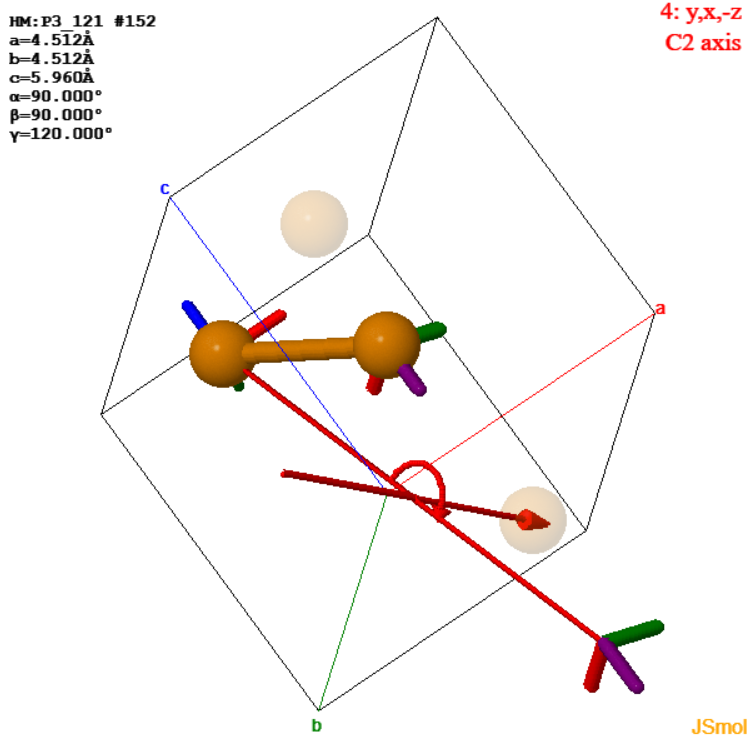


In [153]:
print("Pour la dernière symétrie, nous regarderons l'atome situé en",atome3)
print("A x,y,z doivent correspondre",symetrie_3.as_xyz_string(),", on a donc comme matrice de rotation")
print(symetrie_3.rotation_matrix,"\net vecteur de translation\n",symetrie_3.translation_vector)
print("En effectuant le produit matriciel et en y ajoutant le vecteur de translation on obtient ")
print(np.dot(symetrie_3.rotation_matrix,atome3.T)+(np.array([symetrie_3.translation_vector])).T)
print("Ce qui correspond bien à ",symetrie_3.operate((0.731,0.731,0)),"donné par la fonction operate")
print("Celà se représente comme ceci:")


Pour la dernière symétrie, nous regarderons l'atome situé en [[0.731 0.731 0.   ]]
A x,y,z doivent correspondre -x, -x+y, -z+1/3 , on a donc comme matrice de rotation
[[-1.  0.  0.]
 [-1.  1.  0.]
 [ 0.  0. -1.]] 
et vecteur de translation
 [0.         0.         0.33333333]
En effectuant le produit matriciel et en y ajoutant le vecteur de translation on obtient 
[[-0.731     ]
 [ 0.        ]
 [ 0.33333333]]
Ce qui correspond bien à  [-0.731       0.          0.33333333] donné par la fonction operate
Celà se représente comme ceci:


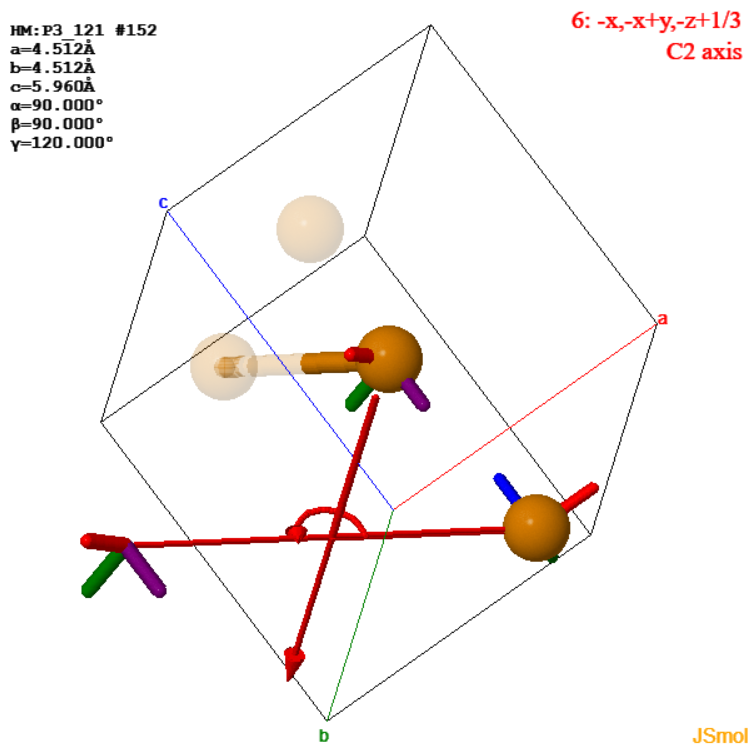